<a href="https://colab.research.google.com/github/MeghanaRanganath98/ML-Capstone-project-Regression/blob/main/Meghana_RS_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


In [3]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/Copy of Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [5]:
df.shape  #number of rows and columns in the dataset

(8760, 14)

In [11]:
df.columns  #all the columns in the dataset

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
df.head() #top five rows 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [22]:
df.tail()  #last five rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [15]:
df.describe() #statistical analysis

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##  change holiday or no holiday to yes or no

In [6]:
label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}

df = df.replace(label)

df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes


#we can see that dates are unsorted

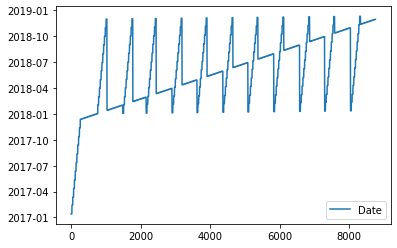

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.plot(y='Date')

## hh:00:00 format from hour columns

In [37]:

hour = [str(hour)+':00:00' if hour>9 else '0'+str(hour)+':00:00' for hour in df['Hour']]

## Add hh:00:00 format to date

In [39]:
df['Date'] = [str(date)[:10]+' '+hour for date, hour in zip(df['Date'].values, hour)]

In [43]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,2017-01-12 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,2017-01-12 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,2017-01-12 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,2017-01-12 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30 19:00:00,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes
8756,2018-11-30 20:00:00,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8757,2018-11-30 21:00:00,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8758,2018-11-30 22:00:00,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes


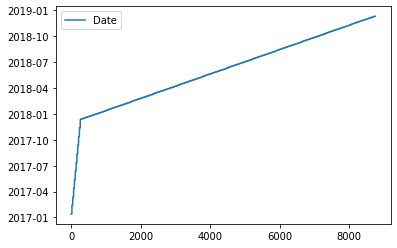

In [9]:
# # Sort dates
df = df.sort_values(by=['Date']).reset_index(drop=True)
df.plot(y='Date')


In [10]:
# Create days and months as new features
dates = df.Date
days = [date.weekday() for date in dates]
months = [date.month for date in dates]

df['day'] = days
df['month'] = months

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No,Yes,3,1
1,2017-01-12,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No,Yes,3,1
2,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No,Yes,3,1
3,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No,Yes,3,1
4,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No,Yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-11,1084,15,13.8,34,2.4,1438,-1.8,1.45,0.0,0.0,Autumn,No,Yes,1,12
8756,2018-12-11,886,14,14.2,33,1.5,1374,-1.8,1.84,0.0,0.0,Autumn,No,Yes,1,12
8757,2018-12-11,785,11,10.3,40,0.7,1672,-2.7,1.66,0.0,0.0,Autumn,No,Yes,1,12
8758,2018-12-11,888,12,12.3,37,0.8,1690,-1.9,1.93,0.0,0.0,Autumn,No,Yes,1,12


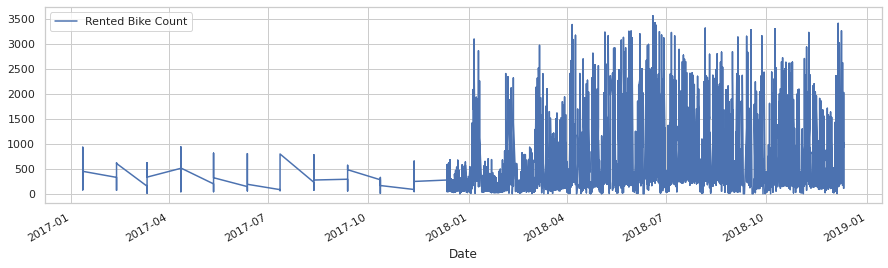

In [67]:
df.plot(x='Date', y='Rented Bike Count', figsize=(15,4))

so by above visualization we can see that the number of bike rents in 2017 was less than in 2018. The bike rents peaked in July 2018 then reduced slightly until December 2018.

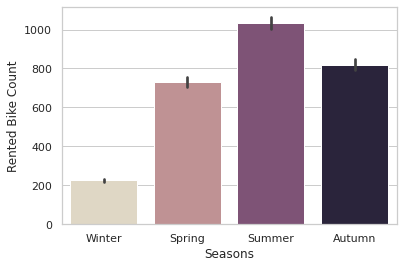

In [25]:


import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Seasons", y="Rented Bike Count", data=df,palette='ch:s=-.2,r=.6')


## The seasonal movement of bike counts correlates very well with temperature, solar radiation, and humidity. The highest count of rented bikes occurs in summer, while the least occurs in winter.

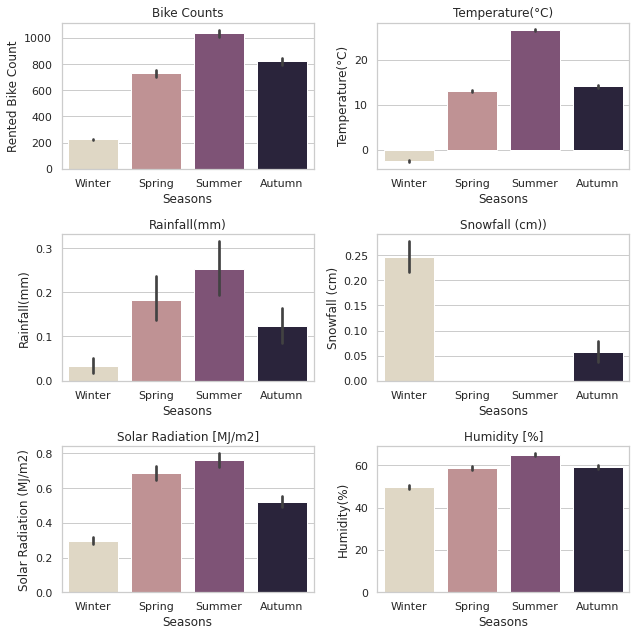

In [65]:
f, ax = plt.subplots(3,2, figsize=(9,9))
y = [['Rented Bike Count', 'Temperature(°C)'], ['Rainfall(mm)', 'Snowfall (cm)'], ['Solar Radiation (MJ/m2)', 'Humidity(%)']]


for i in range(3):
    for j in range(2):
       sns.barplot(data=df, x='Seasons', y=y[i][j], ax=ax[i][j], palette='ch:s=-.2,r=.6')
       ax[i][j].set_title(title[i][j])

plt.tight_layout()     